<a href="https://colab.research.google.com/github/Rahul2899/Image--Classification--Pytorch/blob/main/image_classification_using_pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch

In [ ]:
torch.__version__

'2.5.1+cu121'

In [ ]:
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor , Lambda , Compose
import matplotlib.pyplot as plt

In [ ]:
#Downloading data
training_data = datasets.FashionMNIST(
    root="data",
    train = True,
    download = True,
    transform=ToTensor()
)

test_data =  datasets.FashionMNIST(
    root = "data",
    train = False,
    download=True,
    transform=ToTensor()

)

In [ ]:
batch_size = 20

train_dataloader = DataLoader(training_data,batch_size=batch_size)
test_dataloader = DataLoader(test_data,batch_size=batch_size)

In [ ]:
for X,y in test_dataloader:
  print(x,y)

Streaming output truncated to the last 5000 lines.
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        ...,


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 

In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using {device} device")

Using cuda device


In [ ]:
#Define our custom model

class NeuralNetworks(nn.Module):
  def __init__(self):
    super(NeuralNetworks,self).__init__()
    self.flatten = nn.Flatten()
    self.linear_relue_stack = nn.Sequential(
        nn.Linear(28*28,512),
        nn.ReLU(),
        nn.Linear(512,512),
        nn.ReLU(),
        nn.Linear(512,10)
    )

  def forward(self,x):
    x = self.flatten(x)
    logits = self.linear_relue_stack(x)
    return logits

In [ ]:
device

'cuda'

In [ ]:
model = NeuralNetworks().to(device)
print(model)

NeuralNetworks(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relue_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
  )
)


In [ ]:
loss_fn = nn.CrossEntropyLoss()

optimizer = torch.optim.SGD(model.parameters(),lr=1e-3)

In [ ]:
def train(dataloader, model, loss_fn, optimizer):
  size = len(dataloader.dataset)
  model.train()
  running_loss = 0.0
  for batch, (X, y) in enumerate(dataloader):
    X, y = X.to(device), y.to(device)

    # Compute prediction error
    pred = model(X)
    loss = loss_fn(pred, y)

    # Backpropagation
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    running_loss += loss.item()

    if batch % 100 == 0:
      loss, current = loss.item(), batch * len(X)
      print(f"loss: {loss:>7f} [{current:>5d}/{size:>5d}]")

  avg_loss = running_loss / len(dataloader)
  print(f"Avg Training Loss: {avg_loss:>8f}")


In [ ]:
#Testing loop

def test(dataloader, model, loss_fn):
  size =len(dataloader.dataset)
  num_batches = len(dataloader)
  model.eval()
  test_loss, correct = 0,0
  with torch.no_grad():
    for X,y in dataloader:
      X,y = X.to(device), y.to(device)
      pred = model(X)
      loss = loss_fn(pred, y)
      test_loss += loss.item()
      correct += (pred.argmax(1) == y).type(torch.float).sum().item()

  test_loss /= num_batches
  correct /= size
  print(f"Test Error: \n Accuracy: {(100 * correct):>0.1f}%, Avg loss: {test_loss:>8f}\n")

In [ ]:
# Start training

epoch = 10

for t in range(epoch):
  print(f"Epoch {t+1}\n----------------------------------")
  train(train_dataloader,model,loss_fn,optimizer)
  test(test_dataloader,model,loss_fn)
print("Done!")

In [ ]:
## Save the moodel

torch.save(model.state_dict(),"model.pth")
print("Model Saved!")

Model Saved!


In [ ]:
# Load Model

model = NeuralNetworks()
model.load_state_dict(torch.load("model.pth"))

<ipython-input-87-c4d7903090cb>:4: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load("model.pth"))


<All keys matched successfully>

In [ ]:
# Prediction classes :

classes = [
    "T-shirt/top",
    "Trouser",
    "Pullover",
    "Dress",
    "Coat",
    "Sandal",
    "Shirt",
    "Sneaker",
    "Bag",
    "Ankle boot",
]

In [ ]:
len(classes)

10

In [ ]:
classes[3]

'Dress'

In [ ]:
model.eval()

NeuralNetworks(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relue_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
  )
)

In [ ]:
x,y = test_data[0][0], test_data[0][1]
y

9

In [ ]:
with torch.no_grad():
  pred = model(x)
  predicted, actual = classes[pred[0].argmax(0)], classes[y]
  print(f'Predicted: "{predicted}", Actual: "{actual}"')

Predicted: "Ankle boot", Actual: "Ankle boot"


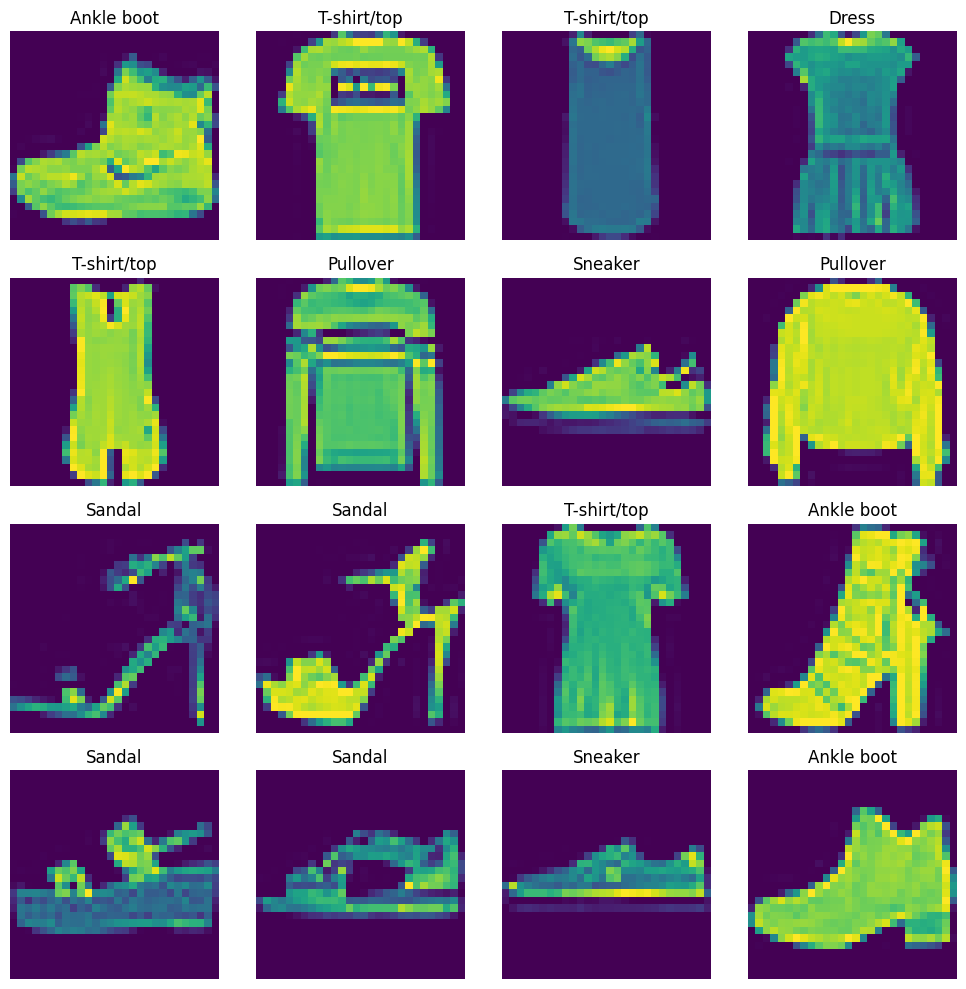

In [ ]:
import numpy as np
import torchvision

for images,labels in train_dataloader:
  break

images = images.numpy()

#Plot the images
fig , axes = plt.subplots(nrows=4,ncols=4,figsize=(10,10))
for i , ax in enumerate(axes.flat):
  ax.imshow(np.transpose(images[i],(1,2,0)))
  ax.set_title(classes[labels[i]])
  ax.axis('off')

plt.tight_layout()
plt.show()
